In [2]:
import matplotlib.pyplot as plt
import numpy as np

n = 50
A = np.empty((n, n))
b = np.empty(n)
for i in range(1,n+1,1):
    for j in range(1,n+1,1):
        A[i-1, j-1] = 2 * (i/10)**2 - 1.05 * (i/10)**4 + (i/10)**6 + (i/10) * (j/10) + (j/10)**2
        b[j-1] = j/20



In [3]:
print(A)

[[3.98960000e-02 7.98960000e-02 1.39896000e-01 ... 2.35398960e+01
  2.45198960e+01 2.55198960e+01]
 [1.08384000e-01 1.58384000e-01 2.28384000e-01 ... 2.40783840e+01
  2.50683840e+01 2.60783840e+01]
 [2.12224000e-01 2.72224000e-01 3.52224000e-01 ... 2.46522240e+01
  2.56522240e+01 2.66722240e+01]
 ...
 [1.17197768e+04 1.17202868e+04 1.17208168e+04 ... 1.17653668e+04
  1.17668168e+04 1.17682868e+04]
 [1.32845031e+04 1.32850231e+04 1.32855631e+04 ... 1.33305631e+04
  1.33320231e+04 1.33335031e+04]
 [1.50192600e+04 1.50197900e+04 1.50203400e+04 ... 1.50657900e+04
  1.50672600e+04 1.50687500e+04]]


In [4]:
print(b)

[0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65 0.7
 0.75 0.8  0.85 0.9  0.95 1.   1.05 1.1  1.15 1.2  1.25 1.3  1.35 1.4
 1.45 1.5  1.55 1.6  1.65 1.7  1.75 1.8  1.85 1.9  1.95 2.   2.05 2.1
 2.15 2.2  2.25 2.3  2.35 2.4  2.45 2.5 ]


## Arnoldi Algorithm

The Arnoldi iteration is an algorithm for finding a basis for the Krylov subspace of a matrix and a given vector.
It is commonly used to approximate the dominant eigenvalues and eigenvectors of a large, sparse matrix. 

The basic idea behind the Arnoldi iteration is to start with a given vector, and repeatedly apply the matrix of interest to the current vector, orthonormalizing the resulting vectors at each step to form a basis for the Krylov subspace.

The algorithm starts with a non-zero starting vector and produce a orthonormal basis for the krylov subspace, where k is the dimension of the krylov subspace. 
The subspace is defined as the linear space generated by matrix-vector multiplications of the matrix A and the starting vector v, that is, K_m(A,v) = span(v, Av, A^2v, ..., A^(m-1)v).
It has also application in solving linear systems by constructing an orthonormal basis for the krylov subspace K_m(A,r0) where r0 = b-Ax0 (residual vector) and x0 is an initial approximation of the solution.
Then it solves the problem in this subspace using the orthonormal basis by projecting the linear system onto this subspace.

Approximated solutions for k= 5 
 [ 0.16821759  0.15363476  0.13262909  0.10553239  0.09575682  0.07930116
  0.05390869  0.03253596  0.02061182 -0.01706995 -0.0353135  -0.05235535
 -0.06570751 -0.09041479 -0.10158924 -0.15166509 -0.15292388 -0.13093332
 -0.22154556 -0.23655951 -0.26519595 -0.23009395 -0.31591935 -0.09141301
 -0.33222214 -0.39251938 -0.23078904 -0.26836567  0.23051729 -0.19736598
  0.80715889 -0.93815663 -0.47201666 -0.04979388 -0.25212367  1.34157013
  1.68133097 -0.45270604  2.92160247  0.04613001 -4.83103862  0.7448741
 -0.238778    1.93919369  0.2398598   4.15282042  3.2583519   0.17188716
 -3.32456631 -4.23828314]
Real solution 
 [ 0.13962607 -0.05385272 -0.30003166  0.01379953 -0.10916111  0.04288753
 -0.11152539 -0.10692798  0.04517699 -0.02280938 -0.12943972  0.17721448
 -0.10878835  0.06478205  0.13369084 -0.13435796 -0.06946609  0.11853636
  0.11771423 -0.13438427  0.25707053  0.12937097  0.10286771 -0.07815546
 -0.12498425  0.08706394 -0.08582786  0.05118303 

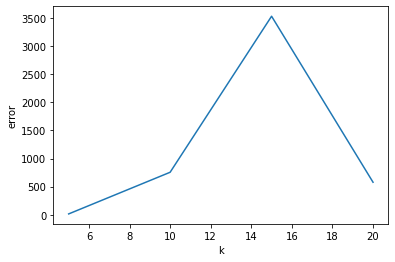

In [155]:

def arnoldi_solver(A, b, x0, k):
    
    r = b - np.dot(A, x0)
    x = x0
    e1 = np.zeros(k+1)
    e1[0] = 1
    Q = np.empty((A.shape[0], k + 1))
    H = np.zeros((k + 1, k))
    r_norm=np.linalg.norm(r)
    Q[:, 0] = r / r_norm   # Use it as the first Krylov vector

    # Gram-Schmidt
    for i in range(k):
        v = np.dot(A, Q[:, i]) # Generate a new candidate vector
        for j in range(i + 1):
            H[j, i] = np.dot(Q[:, j], v)
            v = v - H[j, i] * Q[:, j]  # Subtract the projections on previous vectors
        H[i + 1, i] = np.linalg.norm(v)
        if H[j+1,j] == 0:
            # Break if the j+1-th column of V is the zero vector
            break
        Q[:, i + 1] = v / H[i + 1, i]

        e11=np.dot(r_norm,e1)
        y = np.linalg.solve(H[:i,:i],e11[:i])
        x1 = x0 + Q[:, :i] @ y
    return x1

# set the value of k
k_values = [5, 10, 15,20]
error = []

for k in k_values:
    x_approx = arnoldi_solver(A, b, x0, k)
    x_true = np.linalg.solve(A, b)
    error.append(np.linalg.norm(x_approx - x_true) / np.linalg.norm(x_true))
    print("Approximated solutions for k=",k,"\n",x_approx)
    print("Real solution","\n",x_true)
    print("Error for k=",k,"\n",error)

# Plot the results
plt.plot(k_values, error)
plt.xlabel('k')
plt.ylabel('error')
plt.show()


## Generalized Minimum Residual

The Generalized Minimum Residual (GMRES) method is an iterative algorithm for solving large, sparse linear systems of equations. Like the Arnoldi iteration, it makes use of the Krylov subspace, which is the linear space spanned by matrix-vector multiplications of a matrix and a given vector. The GMRES algorithm is designed to minimize the residual vector at each iteration, and therefore, converge faster than other iterative methods such as the simple Jacobi or Gauss-Seidel methods.

The GMRES algorithm starts with an initial approximation x0 and a residual vector r0=b-A*x0. It then constructs an orthonormal basis for the Krylov subspace K_m(A, r0), where m is the dimension of the subspace. The algorithm then projects the residual vector onto the Krylov subspace and minimizes the residual vector in this subspace. The solution is then updated by computing x_new = x_old + w_m, where w_m is the coefficient of the vector in the orthonormal basis which minimizes the residual vector.

It also require less memory than full orthogonalization methods like Arnoldi as it only keep track of m vectors (m is the dimension of the Krylov subspace) at each iteration and then discard the older one.

Approximated solutions for k= 5 
 [-0.03081551 -0.02904246 -0.02767428 -0.02697058 -0.02515275 -0.02325546
 -0.02213442 -0.02105737 -0.01933619 -0.01890753 -0.01736438 -0.01592252
 -0.01410496 -0.01303327 -0.01088809 -0.01175384 -0.0097188  -0.00522802
 -0.00871137 -0.00707322 -0.00634949 -0.00195025 -0.00395786  0.01016909
 -0.00164307 -0.00205985  0.01317133  0.00537018  0.04242781  0.01572386
  0.07788736 -0.02140072  0.00133711  0.04722879  0.0133618   0.1200553
  0.17528673 -0.01356025  0.20498252  0.05561177 -0.25718167  0.05380109
 -0.03241713  0.17688611 -0.02204413  0.25200787  0.07009338  0.03413154
 -0.25246515 -0.396359  ]
Real solution 
 [ 0.13962607 -0.05385272 -0.30003166  0.01379953 -0.10916111  0.04288753
 -0.11152539 -0.10692798  0.04517699 -0.02280938 -0.12943972  0.17721448
 -0.10878835  0.06478205  0.13369084 -0.13435796 -0.06946609  0.11853636
  0.11771423 -0.13438427  0.25707053  0.12937097  0.10286771 -0.07815546
 -0.12498425  0.08706394 -0.08582786  0.05118303 

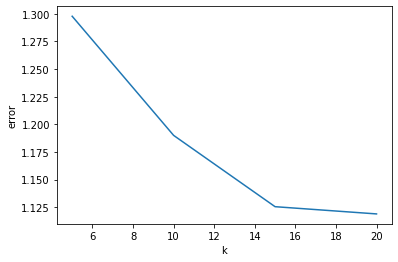

In [154]:

def gmres_solver(A, b, x0, k):
   
    r = b - np.dot(A, x0)
    x = x0
    e1 = np.zeros(k+1)
    e1[0] = 1
    Q = np.empty((A.shape[0], k + 1))
    H = np.zeros((k + 1, k))
    r_norm=np.linalg.norm(r)
    Q[:, 0] = r / r_norm   # Use it as the first Krylov vector

    # Gram-Schmidt
    for i in range(k):
        v = np.dot(A, Q[:, i])  # Generate a new candidate vector
        for j in range(i + 1):  
            H[j, i] = np.dot(Q[:, j], v)
            v = v - H[j, i] * Q[:, j]  # Subtract the projections on previous vectors
        H[i + 1, i] = np.linalg.norm(v)
        Q[:, i + 1] = v / H[i + 1, i]

    # solve the least squares problem
        y, _ = np.linalg.lstsq(H, np.dot(r_norm, e1), rcond=None)[:2]
        x1 = x0 + np.dot(Q[:, :k], y)
    return x1

# set the value of k
k_values = [5, 10, 15,20]
error = []

for k in k_values:
    x_approx = gmres_solver(A, b, x0, k)
    x_true = np.linalg.solve(A, b)
    error.append(np.linalg.norm(x_approx - x_true) / np.linalg.norm(x_true))
    print("Approximated solutions for k=",k,"\n",x_approx)
    print("Real solution","\n",x_true)
    print("Error for k=",k,"\n",error)

# Plot the results
plt.plot(k_values, error)
plt.xlabel('k')
plt.ylabel('error')
plt.show()


### Comparison

Before we examine our results, let's talk about the main differences between the two algorithms.

The main difference between the two methods is that Arnoldi iteration produces an orthonormal basis for the Krylov subspace, which can be used for eigenvalue computations and other applications, while GMRES is designed to minimize the residual vector and find the solution quickly.
Furthermore, Arnoldi iteration is full orthogonalization method, it will keep the all the vectors from subspace and uses it for eigenvalue computations, while GMRES only keeps track of m vectors at each iteration (m is the dimension of the Krylov subspace) and discard the older one.